<a href="https://colab.research.google.com/github/Andreabenitez8619/diplomado/blob/main/Copia_de_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de datos atípicos

Equipo 2
Andrea Benítez Pineda

Una empresa matriz de logística está interesada en identificar a las sucursales(empresas) que declaran el número de empleados fuera de lo común (por ejemplo, una empresa que declaró tener 10 empleados y en el momento dice tener 1 empleado).
Para este ejercicio se trabajará con los datos registrados en el 2014.




##Librerias

In [ ]:
#libreria para trabajar con dataframes
import pandas as pd
import numpy as np

#####     Visualización
#from pandas._libs.hashtable import value_count
#import matplotlib.pyplot as plt
#import seaborn as sns


###     Modelo
#!pip install pyod
#from pyod.models.knn import KNN


##Dataset de registros

In [ ]:
# Visualizamos el data set
df=pd.read_csv("/content/auxiliar.txt.zip", sep=',', header=0)
df.head()


<ipython-input-2-a9746ca9ac11>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/auxiliar.txt.zip", sep=',', header=0)


,id_sujeto,fcobro,perini,perfin,perayo,perven,vencim,impuesto,derecho,importe1,...,cobranza,embargo,recargo1,recargo2,otros,subsidio,bonifica,total,totemp1,totemp2
0,FJG791NI,2014-01-01,201312,0,0,0,0,157.38,157.38,6295.0,...,0.0,0.0,0.00,0.0,157.38,0.0,0.0,157.0,3,0
1,FIB598CA,2014-01-01,201306,0,0,0,0,236.75,236.75,9470.0,...,0.0,0.0,17.20,0.0,241.58,0.0,0.0,259.0,4,0
2,FIB598CA,2014-01-01,201307,0,0,0,0,197.75,197.75,7910.0,...,0.0,0.0,10.80,0.0,201.86,0.0,0.0,213.0,4,0
3,GRP758TJ,2014-01-01,201311,0,0,0,0,97.15,97.15,3886.0,...,0.0,0.0,0.73,0.0,97.15,0.0,0.0,98.0,2,0
4,ADE811WT,2014-01-02,201310,0,0,0,0,194.43,194.43,7777.0,...,0.0,0.0,3.08,0.0,196.24,0.0,0.0,199.0,2,0


##Variables de interés

**1.** Las variables de interés son **id_sujeto (empresa), fcobro** (fecha en que se realizó el pago al empleado), **perini**
(periodo de registro ) y **totemp1** (número de empleados)

In [ ]:
#seleccionamos las variables de interes
df1=df[['id_sujeto','fcobro','perini','totemp1']]
df1

,id_sujeto,fcobro,perini,totemp1
0,FJG791NI,2014-01-01,201312,3
1,FIB598CA,2014-01-01,201306,4
2,FIB598CA,2014-01-01,201307,4
3,GRP758TJ,2014-01-01,201311,2
4,ADE811WT,2014-01-02,201310,2
...,...,...,...,...
1132949,DXK595EG,2014-12-17,201411,4
1132950,GWJ265DG,2014-12-17,201411,3
1132951,PDL267CR,2014-12-17,201411,8
1132952,GDE996WT,2014-12-17,201411,6


In [ ]:
#tipos de datos
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132954 entries, 0 to 1132953
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   id_sujeto  1132901 non-null  object
 1   fcobro     1132954 non-null  object
 2   perini     1132954 non-null  int64 
 3   totemp1    1132954 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 34.6+ MB


In [ ]:
#Conocer cuantas finas y columnas contiene el dataframe
m,n = df1.shape
print("Filas:", m)
print("Columnas:", n)

Filas: 1132954
Columnas: 4


In [ ]:
#El método isna() de pandas, identificamos entradas faltantes.
df1.isna().sum(axis=0).to_frame().T

,id_sujeto,fcobro,perini,totemp1
0,53,0,0,0


In [ ]:
#Eliminar las filas que contienen uno o más datos faltantes, dejando solo registros completos.
t_df1 = df1.dropna(axis=0)

In [ ]:
#Verificamos que no hay datos faltantes
empty_columns = t_df1.isna().sum(axis=0).to_frame().T
empty_columns

,id_sujeto,fcobro,perini,totemp1
0,0,0,0,0


In [ ]:
#reemplazar el dataframe original por el nuevo sin elementos faltantes.
df = t_df1
df

,id_sujeto,fcobro,perini,totemp1
0,FJG791NI,2014-01-01,201312,3
1,FIB598CA,2014-01-01,201306,4
2,FIB598CA,2014-01-01,201307,4
3,GRP758TJ,2014-01-01,201311,2
4,ADE811WT,2014-01-02,201310,2
...,...,...,...,...
1132949,DXK595EG,2014-12-17,201411,4
1132950,GWJ265DG,2014-12-17,201411,3
1132951,PDL267CR,2014-12-17,201411,8
1132952,GDE996WT,2014-12-17,201411,6


In [ ]:
#Verificamos que perini tenga el formato aaaamm
print(df['perini'].unique())

[201312 201306 201307 201311 201310 201005 201106 201108 201102 201012
 201007 201010 201004 201011 201101 201103 201008 201107 201302 201303
 201308 201304 201309 201305 201212 201203 201210 201211 201209 201205
 201207 201301 201206 201201 201204 201202 201208 201009 201006 200810
 201112 201111 200906 200905 200903 200902 200901 200912 200907 200904
 200908 201105 201104 201003 201002 201110 201109 201001 200909 200911
 200910 200812 200811 201401 200806 200804 200803 200801 200802 200805
 200807 200808 200809 200511 200412 200608 200703 200702 200612 200611
 200701 200610 200609      0 201402 200401 200709 200708 200704 200710
 200705 200706 200712 200711 200707 200402 200506 201403 200403 201404
 200404 201405 200405 201406 200503 200501 200502 200512 200510 200508
 200507 200509 200505 200504 200602 200607 200605 200606 200603 200601
 200604 200406 201407 201408 200407 200408 201409 200409 201410 200410
 201411 200411 201412  20135  20134  20136  20139  20138  20137  20133
  2013

In [ ]:
#Ordenamos los datos ascendentemente
df.sort_values("perini",ascending=True).head(870)

,id_sujeto,fcobro,perini,totemp1
837239,XWG653UV,2014-05-06,0,0
837260,XWG653UV,2014-10-08,0,0
837225,BAG365BF,2014-02-18,0,0
837259,CFK333GP,2014-09-22,0,0
837258,XWG653UV,2014-09-09,0,0
...,...,...,...,...
838119,ZMN835XN,2014-05-15,20139,0
837728,DHH462IW,2014-04-29,20139,0
965727,AFK269AT,2014-07-11,199503,0
1059521,GCI577ZM,2014-10-27,199901,0


In [ ]:
#Seleccionamos los datos que no cumplen con el formato
print(df[(df['perini'] <199503)])

        id_sujeto      fcobro  perini  totemp1
70581    DQO158FI  2014-01-10       0        0
553674   DQO158FI  2014-08-26       0        0
553675   DQO158FI  2014-08-26       0        0
553676   DQO158FI  2014-08-26       0        0
553677   DQO158FI  2014-08-26       0        0
...           ...         ...     ...      ...
1022543  FWX859NA  2014-09-18       2        0
1057317  TMM189HK  2014-10-21       2        0
1059906  TVF425CT  2014-10-27     200        0
1067310  HTO895EF  2014-10-28       0        0
1068806  LND915TB  2014-10-13    2013        0

[867 rows x 4 columns]


Eliminaremos 867 filas

In [ ]:
#Eliminamos los datos
dpe=df.drop(df[(df['perini'] <199503)].index, inplace=True)
print(dpe)

None


<ipython-input-13-1ba4c51319c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpe=df.drop(df[(df['perini'] <199503)].index, inplace=True)


In [ ]:
#datos limpios sin valores faltantes, con perini en el mismo formato
df

,id_sujeto,fcobro,perini,totemp1
0,FJG791NI,2014-01-01,201312,3
1,FIB598CA,2014-01-01,201306,4
2,FIB598CA,2014-01-01,201307,4
3,GRP758TJ,2014-01-01,201311,2
4,ADE811WT,2014-01-02,201310,2
...,...,...,...,...
1132949,DXK595EG,2014-12-17,201411,4
1132950,GWJ265DG,2014-12-17,201411,3
1132951,PDL267CR,2014-12-17,201411,8
1132952,GDE996WT,2014-12-17,201411,6


In [ ]:
#Los datos de fecha de cobro tienen el mismo formato, no se reliza limpieza
print(df['fcobro'].unique())
print(df['fcobro'].nunique())

['2014-01-01' '2014-01-02' '2014-01-03' '2014-01-04' '2014-01-05'
 '2014-01-06' '2014-01-09' '2014-01-10' '2014-01-13' '2014-01-17'
 '2014-01-11' '2014-01-12' '2014-01-18' '2014-01-19' '2014-01-20'
 '2014-01-21' '2014-01-31' '2014-01-22' '2014-01-23' '2014-01-24'
 '2014-01-25' '2014-01-26' '2014-01-27' '2014-01-28' '2014-01-29'
 '2014-01-30' '2014-01-07' '2014-01-08' '2014-01-14' '2014-01-15'
 '2014-01-16' '2014-02-27' '2014-02-26' '2014-02-18' '2014-02-17'
 '2014-02-16' '2014-02-19' '2014-02-20' '2014-02-22' '2014-02-23'
 '2014-02-24' '2014-02-25' '2014-02-28' '2014-02-21' '2014-02-07'
 '2014-02-01' '2014-02-02' '2014-02-03' '2014-02-04' '2014-02-05'
 '2014-02-06' '2014-02-08' '2014-02-09' '2014-02-10' '2014-02-11'
 '2014-02-12' '2014-02-13' '2014-02-14' '2014-02-15' '2014-03-19'
 '2014-03-28' '2014-03-15' '2014-03-01' '2014-03-02' '2014-03-03'
 '2014-03-11' '2014-03-04' '2014-03-05' '2014-03-06' '2014-03-07'
 '2014-03-08' '2014-03-09' '2014-03-10' '2014-03-12' '2014-03-13'
 '2014-03-

In [ ]:
#totemp1 solo tiene valores enteros, no se realiza limpieza
df['totemp1'].dtypes

dtype('int64')

In [ ]:
#Base limpia
df1=df.copy()
df1.to_csv("auxiliar_limpio.csv")
df1

,id_sujeto,fcobro,perini,totemp1
0,FJG791NI,2014-01-01,201312,3
1,FIB598CA,2014-01-01,201306,4
2,FIB598CA,2014-01-01,201307,4
3,GRP758TJ,2014-01-01,201311,2
4,ADE811WT,2014-01-02,201310,2
...,...,...,...,...
1132949,DXK595EG,2014-12-17,201411,4
1132950,GWJ265DG,2014-12-17,201411,3
1132951,PDL267CR,2014-12-17,201411,8
1132952,GDE996WT,2014-12-17,201411,6


**3.** Identificamos las empresas que realizaron su registro en el  2014 (los perini de 2014) y los clasifícamos por tamaño de 
empresa: micro (de 1 a 10 empleados); pequeña (de 11 a 50 empleados); mediana (de 51 a 100 
empleados) y, grande (más de 100 empleados).

In [ ]:
#base con perini 2014

df2014=df[(df['perini']<201501)&(df['perini']>201312)]
df2=df2014.copy()
df2

,id_sujeto,fcobro,perini,totemp1
1764,CXH423NO,2014-01-21,201401,6
3135,WBX468WB,2014-01-22,201401,1
3504,ORT539RV,2014-01-22,201401,3
4770,QKT842PW,2014-01-23,201401,3
4978,UDM322QR,2014-01-24,201401,2
...,...,...,...,...
1132949,DXK595EG,2014-12-17,201411,4
1132950,GWJ265DG,2014-12-17,201411,3
1132951,PDL267CR,2014-12-17,201411,8
1132952,GDE996WT,2014-12-17,201411,6


In [ ]:
#Agrupamos los contribuyentes y sumamos la cantidad de empleados
df2014 = (df2014.groupby("id_sujeto")
         .agg({"totemp1": "sum"	})
         .reset_index()
         )
df2014

,id_sujeto,totemp1
0,AAA115XE,11
1,AAA392JK,279
2,AAA434OQ,14
3,AAA579CU,65
4,AAA668CW,1044
...,...,...
85992,ZZZ379NL,586
85993,ZZZ411RX,1178
85994,ZZZ628OI,29
85995,ZZZ763TX,110


In [ ]:
#Crea una nueva columna que muestre
# la clasificación por tamaño de empresa en el conjunto de datos por medio de condicionales.

conditionlist = [
    (df2014['totemp1'] >= 1) &(df2014['totemp1']<=10),
    (df2014['totemp1'] >= 11) &(df2014['totemp1']<=50),
    (df2014['totemp1'] >= 51) &(df2014['totemp1']<=100),
    (df2014['totemp1'] >= 101)]
choicelist = ['micro', 'pequeña', 'mediana','grande']
df2014['clasificación'] = np.select(conditionlist, choicelist, default='Not Specified')



In [ ]:
df2014

,id_sujeto,totemp1,clasificación
0,AAA115XE,11,pequeña
1,AAA392JK,279,grande
2,AAA434OQ,14,pequeña
3,AAA579CU,65,mediana
4,AAA668CW,1044,grande
...,...,...,...
85992,ZZZ379NL,586,grande
85993,ZZZ411RX,1178,grande
85994,ZZZ628OI,29,pequeña
85995,ZZZ763TX,110,grande


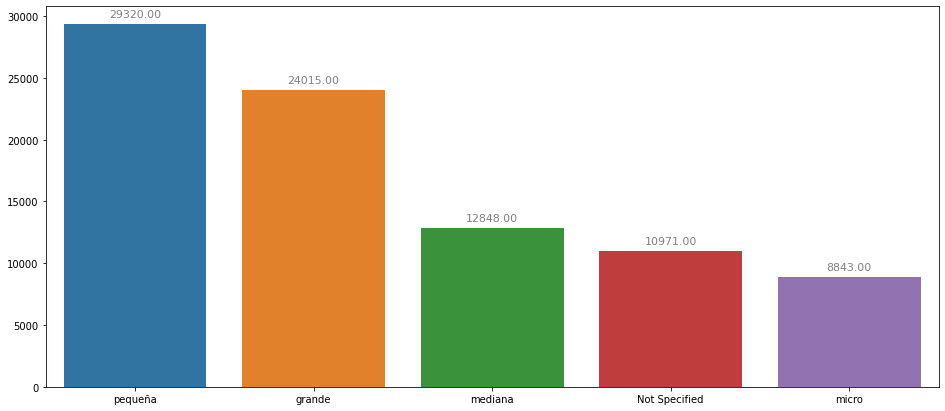

In [ ]:
from pandas._libs.hashtable import value_count
import matplotlib.pyplot as plt
import seaborn as sns

q=df2014['clasificación'].value_counts()

#Definimos el tamaño del canvas
plt.figure(figsize=(16,7))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.

ax=sns.barplot(x = q.index, y = q.values)


# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=11, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')
    
plt.show()

Se identificaron **85997** empresas en el 2014, con una media de cantidad de empleados de **364**
 y un máximo de **699211** empleados.
 De la clasificación de las empresas:

*   29320 son pequeñas empresas.
*   24015 son grandes empresas.
*   12848 son medianas empresas.
*   8843 son micro empresas.
*   10971 se consideran no especificadas por registrar 0 empleados.







In [ ]:
#unimos 2 dataframes, totemp_x= empleados declarados mes con mes, totemp1_y=suma de totemp1_x
df3=df2.merge(df2014, how="inner", on="id_sujeto")
df3

,id_sujeto,fcobro,perini,totemp1_x,totemp1_y,clasificación
0,CXH423NO,2014-01-21,201401,6,47,pequeña
1,CXH423NO,2014-03-20,201402,5,47,pequeña
2,CXH423NO,2014-05-12,201403,4,47,pequeña
3,CXH423NO,2014-05-12,201404,4,47,pequeña
4,CXH423NO,2014-06-12,201405,4,47,pequeña
...,...,...,...,...,...,...
813521,HQT836BZ,2014-08-18,201407,1,10,micro
813522,HQT836BZ,2014-09-17,201408,1,10,micro
813523,HQT836BZ,2014-10-20,201409,1,10,micro
813524,HQT836BZ,2014-11-07,201410,1,10,micro


In [ ]:
df_mediana=df3.loc[df3['clasificación']=='mediana']


In [ ]:
df_mediana

,id_sujeto,fcobro,perini,totemp1_x,totemp1_y,clasificación
98,EGJ266QQ,2014-01-28,201401,8,80,mediana
99,EGJ266QQ,2014-02-26,201401,8,80,mediana
100,EGJ266QQ,2014-03-18,201402,8,80,mediana
101,EGJ266QQ,2014-04-22,201403,8,80,mediana
102,EGJ266QQ,2014-06-17,201404,8,80,mediana
...,...,...,...,...,...,...
813478,HNO296TH,2014-08-15,201407,6,64,mediana
813479,HNO296TH,2014-09-12,201408,7,64,mediana
813480,HNO296TH,2014-10-20,201409,7,64,mediana
813481,HNO296TH,2014-11-18,201410,6,64,mediana


##Visualización de los datos

In [ ]:
import plotly.express as px
fig = px.box(df_mediana, x= 'totemp1_x',points = 'all')

fig.show()


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<Axes: xlabel='perini', ylabel='totemp1_x'>

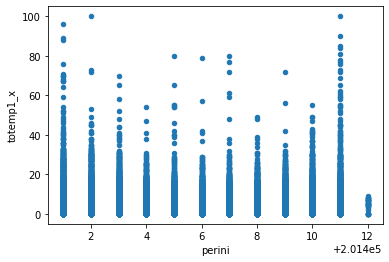

In [ ]:
df_mediana.plot.scatter(x='perini',y='totemp1_x')

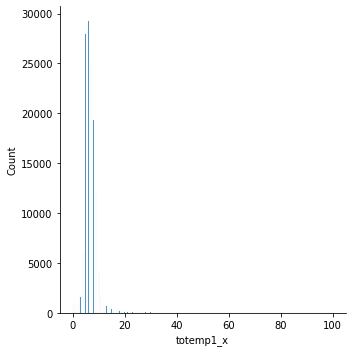

In [ ]:
sns.set_color_codes
sns.displot(x= df_mediana['totemp1_x'])

## Detección de datos atípicos

 El modelo KNN examina los datos.

In [ ]:
#Variables a examinar
X1=df_mediana[['perini',	'totemp1_x'	 ]]

In [ ]:
!pip install pyod
from pyod.models.knn import KNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Inicialización del modelo
KNN_model = KNN()

In [ ]:
# Ajustar el modelo al conjunto de datos
KNN_model.fit(X1)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [ ]:
outlier_labels = KNN_model.labels_
#Encontramos el número de datos atípicos
number_of_outliers = len(outlier_labels[outlier_labels == 1])
print(number_of_outliers)

419


In [ ]:
# Inicialización con un porcentaje de 0.01 de datos atípicos
KNN_model = KNN(contamination=0.01)
# Ajustamos el modelo al conjunto de datos
KNN_model.fit(X1)
# Encontramos las etiquetas
outlier_labels = KNN_model.labels_
# Encontramos el número de datos atípicos
number_of_outliers = len(outlier_labels[outlier_labels == 1])
print(number_of_outliers)

419


In [ ]:
# Encontramos las declaraciones atípicas
outliers = X1.iloc[outlier_labels == 1]

In [ ]:
outliers

,perini,totemp1_x
887,201412,4
5729,201401,41
5730,201403,39
9673,201409,28
9674,201410,28
...,...,...
722203,201409,32
722224,201412,8
722330,201412,8
722544,201412,6


In [ ]:
#outliers.describe()

In [ ]:
df_outer = outliers.merge(df3, how='outer', left_index=True, right_index=True)

In [ ]:
df_outer.head(295)

,perini_x,totemp1_x_x,id_sujeto,fcobro,perini_y,totemp1_x_y,totemp1_y,clasificación
0,NaN,NaN,CXH423NO,2014-01-21,201401,6,47,pequeña
1,NaN,NaN,CXH423NO,2014-03-20,201402,5,47,pequeña
2,NaN,NaN,CXH423NO,2014-05-12,201403,4,47,pequeña
3,NaN,NaN,CXH423NO,2014-05-12,201404,4,47,pequeña
4,NaN,NaN,CXH423NO,2014-06-12,201405,4,47,pequeña
...,...,...,...,...,...,...,...,...
290,NaN,NaN,NCM452DH,2014-10-13,201409,192,19233,grande
291,NaN,NaN,NCM452DH,2014-10-17,201409,3,19233,grande
292,NaN,NaN,NCM452DH,2014-10-29,201410,1690,19233,grande
293,NaN,NaN,NCM452DH,2014-10-29,201410,189,19233,grande


In [ ]:
#identificar NaN
df_outer.isna().sum(axis=0).to_frame().T

,perini_x,totemp1_x_x,id_sujeto,fcobro,perini_y,totemp1_x_y,totemp1_y,clasificación
0,813107,813107,0,0,0,0,0,0


In [ ]:
#Eliminar las filas que contienen uno o más datos faltantes, dejando solo registros completos.
t_df_outer = df_outer.dropna(axis=0)

In [ ]:
#Verificamos que no hay datos faltantes
empty = t_df_outer.isna().sum(axis=0).to_frame().T
empty

,perini_x,totemp1_x_x,id_sujeto,fcobro,perini_y,totemp1_x_y,totemp1_y,clasificación
0,0,0,0,0,0,0,0,0


In [ ]:
#reemplazar el dataframe original por el nuevo sin elementos faltantes.
dfinal = t_df_outer
dfinal.head(80)

,perini_x,totemp1_x_x,id_sujeto,fcobro,perini_y,totemp1_x_y,totemp1_y,clasificación
887,201412.0,4.0,CIH196LQ,2014-12-31,201412,4,65,mediana
5729,201401.0,41.0,GGS186HN,2014-02-17,201401,41,80,mediana
5730,201403.0,39.0,GGS186HN,2014-04-21,201403,39,80,mediana
9673,201409.0,28.0,XKV283EO,2014-10-10,201409,28,100,mediana
9674,201410.0,28.0,XKV283EO,2014-11-14,201410,28,100,mediana
...,...,...,...,...,...,...,...,...
304052,201401.0,70.0,GLH882QI,2014-02-19,201401,70,70,mediana
304674,201403.0,30.0,WAA243EO,2014-05-21,201403,30,56,mediana
305701,201408.0,26.0,HCB655XM,2014-10-17,201408,26,84,mediana
310385,201404.0,30.0,WQE699HO,2014-05-13,201404,30,92,mediana


In [ ]:
df_outer.head(90)

,perini_x,totemp1_x_x,id_sujeto,fcobro,perini_y,totemp1_x_y,totemp1_y,clasificación
0,NaN,NaN,CXH423NO,2014-01-21,201401,6,47,pequeña
1,NaN,NaN,CXH423NO,2014-03-20,201402,5,47,pequeña
2,NaN,NaN,CXH423NO,2014-05-12,201403,4,47,pequeña
3,NaN,NaN,CXH423NO,2014-05-12,201404,4,47,pequeña
4,NaN,NaN,CXH423NO,2014-06-12,201405,4,47,pequeña
...,...,...,...,...,...,...,...,...
85,NaN,NaN,VPU474ZO,2014-07-26,201407,2,22,pequeña
86,NaN,NaN,VPU474ZO,2014-09-13,201408,2,22,pequeña
87,NaN,NaN,VPU474ZO,2014-09-23,201409,2,22,pequeña
88,NaN,NaN,VPU474ZO,2014-10-29,201410,2,22,pequeña


##Ahora veamos algunos ejemplos

In [ ]:
j = dfinal.loc[:, 'id_sujeto'] == 'DHL251EH'
d_final = dfinal.loc[j]
d_final

,perini_x,totemp1_x_x,id_sujeto,fcobro,perini_y,totemp1_x_y,totemp1_y,clasificación
315179,201405.0,31.0,DHL251EH,2014-06-17,201405,31,100,mediana


Dato atípico 31 empleados en mayo

In [ ]:
i = df_outer.loc[:, 'id_sujeto'] == 'DHL251EH'
dfx1 = df_outer.loc[i]
dfx1

,perini_x,totemp1_x_x,id_sujeto,fcobro,perini_y,totemp1_x_y,totemp1_y,clasificación
315178,NaN,NaN,DHL251EH,2014-02-24,201401,7,100,mediana
315179,201405.0,31.0,DHL251EH,2014-06-17,201405,31,100,mediana
315180,NaN,NaN,DHL251EH,2014-07-22,201406,11,100,mediana
315181,NaN,NaN,DHL251EH,2014-08-18,201407,11,100,mediana
315182,NaN,NaN,DHL251EH,2014-10-17,201409,13,100,mediana
315183,NaN,NaN,DHL251EH,2014-11-14,201410,12,100,mediana
315184,NaN,NaN,DHL251EH,2014-12-11,201411,15,100,mediana


Segundo ejemplo

In [ ]:
r= dfinal.loc[:, 'id_sujeto'] == 'HCB655XM'
d_fin = dfinal.loc[r]
d_fin

,perini_x,totemp1_x_x,id_sujeto,fcobro,perini_y,totemp1_x_y,totemp1_y,clasificación
305701,201408.0,26.0,HCB655XM,2014-10-17,201408,26,84,mediana


In [ ]:
z = df_outer.loc[:, 'id_sujeto'] == 'HCB655XM'
dfx = df_outer.loc[z]
dfx

,perini_x,totemp1_x_x,id_sujeto,fcobro,perini_y,totemp1_x_y,totemp1_y,clasificación
305694,NaN,NaN,HCB655XM,2014-02-19,201401,4,84,mediana
305695,NaN,NaN,HCB655XM,2014-03-19,201402,7,84,mediana
305696,NaN,NaN,HCB655XM,2014-04-21,201403,13,84,mediana
305697,NaN,NaN,HCB655XM,2014-05-19,201404,9,84,mediana
305698,NaN,NaN,HCB655XM,2014-06-12,201405,6,84,mediana
305699,NaN,NaN,HCB655XM,2014-07-25,201406,6,84,mediana
305700,NaN,NaN,HCB655XM,2014-09-22,201407,13,84,mediana
305701,201408.0,26.0,HCB655XM,2014-10-17,201408,26,84,mediana


La empresa 'HCB655XM' presenta un registro atípica en agosto de:(13-26) empleados

In [ ]:
writer = pd.ExcelWriter('ejemplos_atípicos.xlsx')
d_final.to_excel(writer,'Sheet1')
dfx1.to_excel(writer,'Sheet2')
d_fin.to_excel(writer,'Sheet3')
dfx.to_excel(writer,'Sheet4')
writer.save()